In [1]:
import numpy as np
import CRNS_library as CRNS_lib
import time
import scipy.io as sio
import pandas as pd
import matplotlib.pyplot as plt
import CRNS_optimizer as CRNS_opt
from scipy.optimize import curve_fit


def func(x, p1, p2):
    return p1 * np.cos(p2 * x) + p2 * np.sin(p1 * x)
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


Not a file to run, only methods included here.

Block completed at time:                       07:43:51 on 2024-09-24


In [2]:

src_path = '.'
##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/JUNG1_Data_UTC.TXT'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Incoming'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Jung = new_data.set_index('DateTime')

##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/OULU_1h_UTC.txt'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Oulu'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Oulu = new_data.set_index('DateTime')


##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/LMKS.txt'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Lmks'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Lmks = new_data.set_index('DateTime')

##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/APTY_1h_UTC.txt'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Apty'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Apty = new_data.set_index('DateTime')



##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/AthensR8.53Alt260 m.txt'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Athens'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Athens = new_data.set_index('DateTime')


##Read in data for one site as example:
#read incoming cosmic ray intensity
file_path=src_path+'/Scaling/MXCO_1h_UTC8.28Alt2274m.txt'
new_data = pd.read_csv(file_path, sep=';', names=['DateTime', 'Mxco'], parse_dates=['DateTime'])
new_data['DateTime'] = pd.to_datetime(new_data['DateTime'])
#print(new_data.head())
Mxco = new_data.set_index('DateTime')

print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 



Block completed at time:                       07:43:51 on 2024-09-24


In [3]:

#ID: 33 Reading: MEBCK001
MEBCK001_site_ID = 33
ii=33
nn="MEBCK001"
bd = 1.31
#for ii, nn in enumerate(sites_names[59:-2], start=59):
print("ID:",ii, "Reading:",nn)
No = 1205

psi = 0.7
omega = 0.0054
beta_ref = -0.0074
beta = beta_ref

ID: 33 Reading: MEBCK001


/tmp/ipykernel_12643/2239203224.py:56: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  DF = DF.resample('1H').mean()


MOD
Pressure
Incoming
Abs_h
SWC5_mean


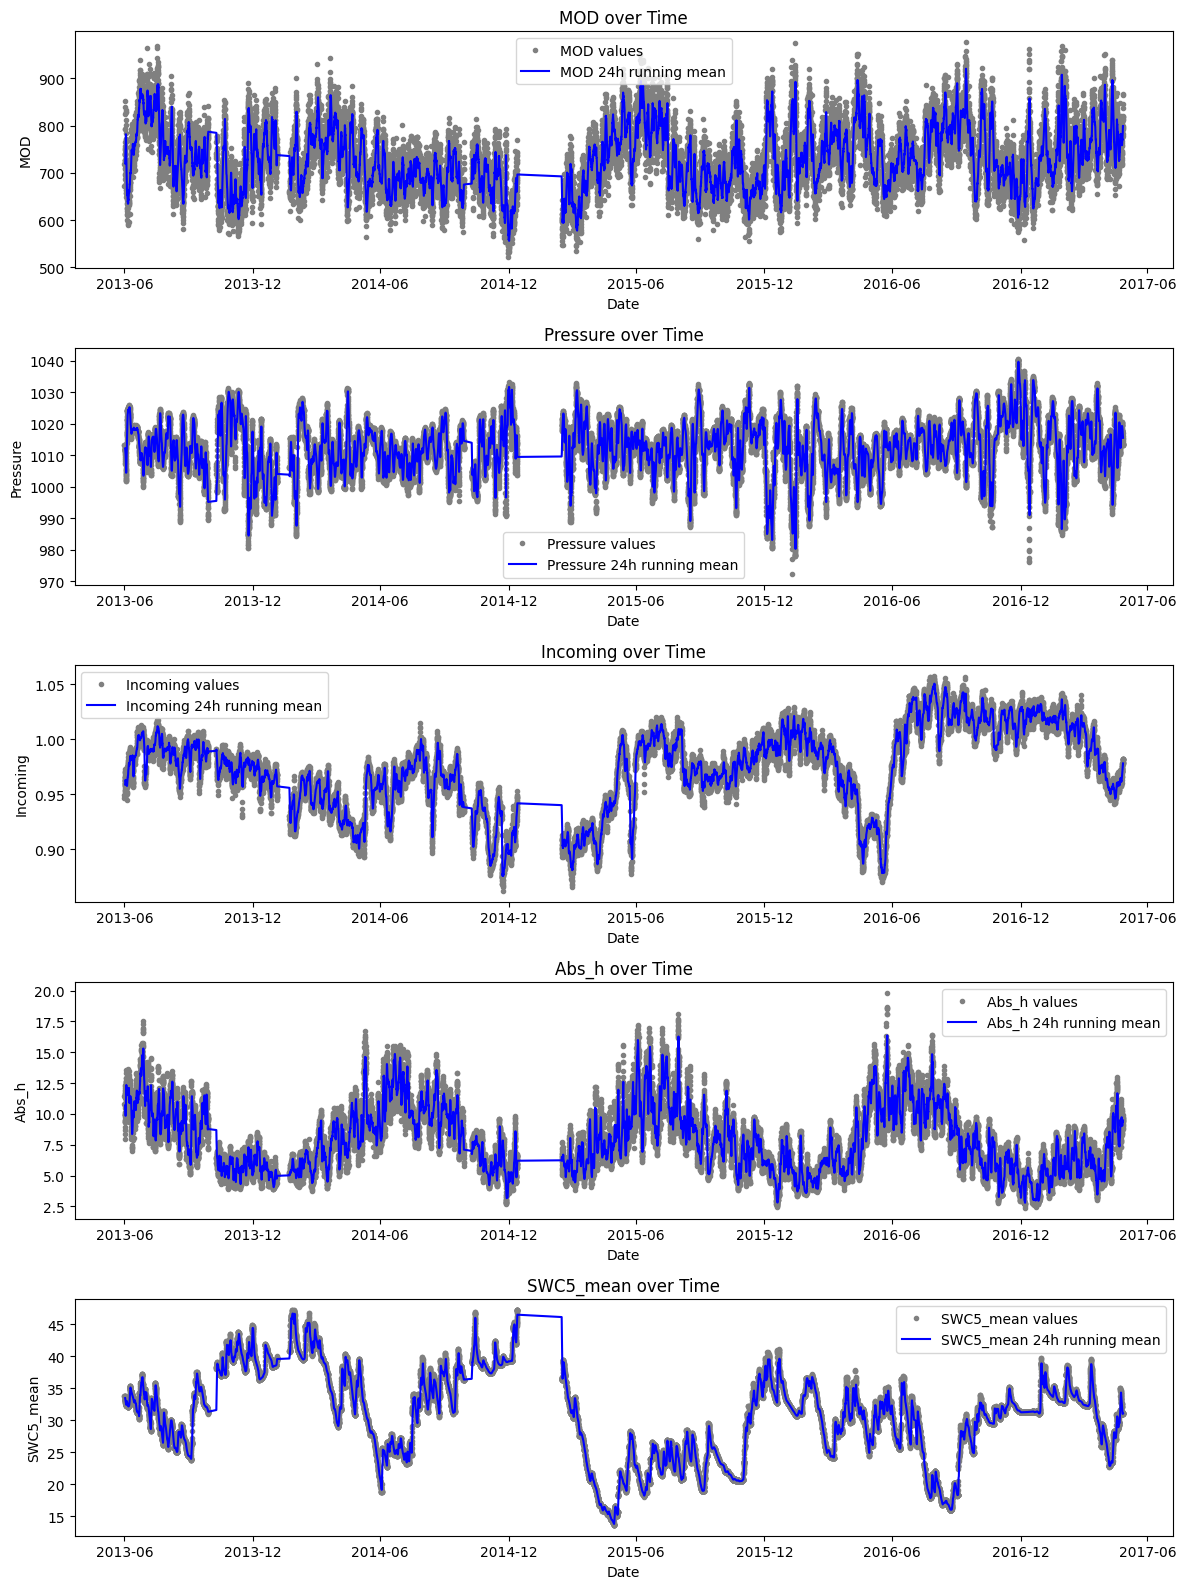


Block completed at time:                       07:43:56 on 2024-09-24


In [4]:
beta=beta_ref

## Schäfertal ID 3 removed; and columns renamed; asterisk remarks removed; BUC001 data gaps were removed
fname='EU_Study_sites.csv'
fname="./Scaling/COSMOS_Europe_Data/Additional_information.csv"
site_info = pd.read_csv(fname)
fname="./Scaling/COSMOS_Europe_Data/General_information.csv"
site_general_info = pd.read_csv(fname)
sites_names = site_info.StationID.to_list()
CutoffRigidity = site_info.CutoffRigidity.to_list()
sites_Bulkdensity = site_info.Bulkdensity.to_list()
sites_Altitude = site_general_info.Altitude.to_list()
sites_Precip = site_general_info.Meanannualprecipitation.to_list()
sites_Temperature = site_general_info.Meanairtemperature.to_list()
sites_lat = site_general_info.Latitude.to_list()
dfi = pd.DataFrame({
    'StationID': sites_names,
    'CutoffRigidity': CutoffRigidity,
    'sites_Precip': sites_Precip,
    'sites_Temperature': sites_Temperature,
    'Bulkdensity': sites_Bulkdensity,
    'Altitude': sites_Altitude
})

# Add new columns (beta, omega, psi) with initial values (you can update these later)
dfi['beta'] = np.nan
dfi['beta_sd'] = np.nan
dfi['beta_mae'] = np.nan
dfi['beta_rmse'] = np.nan
dfi['beta_oulu'] = np.nan
dfi['beta_apty'] = np.nan
dfi['beta_mxco'] = np.nan
dfi['beta_athens'] = np.nan
dfi['omega'] = np.nan
dfi['omega_sd'] = np.nan
dfi['omega_oulu'] = np.nan
dfi['omega_apty'] = np.nan
dfi['omega_mxco'] = np.nan
dfi['omega_athens'] = np.nan
dfi['omega_mae'] = np.nan
dfi['omega_rmse'] = np.nan
dfi['psi'] = np.nan
dfi['psi_sd'] = np.nan
dfi['psi_oulu'] = np.nan
dfi['psi_apty'] = np.nan
dfi['psi_athens'] = np.nan
dfi['psi_mxco'] = np.nan
dfi['psi_mae'] = np.nan
dfi['psi_rmse'] = np.nan
dfi['BetaDesilets'] = np.nan
dfi['mean_P'] = np.nan

DF = CRNS_lib.load_EU_data(src_path+'/Scaling/COSMOS_Europe_Data/',nn)
DF['Abs_h'] = CRNS_opt.Absolute_conv(DF.RH, DF.TEMP)
#resample to 1 hour exactly, for merging with 1h inc. radiation
DF = DF.resample('1H').mean()

DF = DF.join(Jung)
DF = DF.join(Apty)
DF = DF.join(Oulu)
DF = DF.join(Athens)
DF = DF.join(Mxco)

#calculate relative scaling for inc. radiation
DF["Incoming"] = DF["Incoming"]/np.nanmean(DF["Incoming"])#Jung
DF["Apty"] = DF["Apty"]/np.nanmean(DF["Apty"])
DF["Oulu"] = DF["Oulu"]/np.nanmean(DF["Oulu"])
DF["Mxco"] = DF["Mxco"]/np.nanmean(DF["Mxco"])
DF["Athens"] = DF["Athens"]/np.nanmean(DF["Athens"])

## Read SWC and make CRNS flux with:
dat = pd.read_csv('./Scaling/SWC_Timeseries.txt',sep=';')
#Datum;SWC5_mean
#01.07.2013 00:00;43.92
dat['DateTime_utc'] = pd.to_datetime(dat['DateTime_utc'], format='%d.%m.%Y %H:%M', utc=True)#rm: utc=True
dat['DateTime_utc'] = dat['DateTime_utc'].dt.tz_localize(None)
dat = dat.set_index('DateTime_utc')
DF = DF.join(dat)

mydf = DF.copy()
mydf.loc[mydf['MOD'] < 50, 'MOD'] = np.nan
mydf.loc[mydf['MOD'] > 6000, 'MOD'] = np.nan
mydf.loc[mydf['Pressure'] < 400, 'Pressure'] = np.nan
mydf.loc[mydf['Pressure'] > 1200, 'Pressure'] = np.nan
mydf.loc[mydf['Incoming'] < 0.5, 'Incoming'] = np.nan
mydf.loc[mydf['Incoming'] > 1.5, 'Incoming'] = np.nan
mydf.loc[mydf['Abs_h'] < 0, 'Abs_h'] = np.nan
mydf.loc[mydf['Abs_h'] > 35, 'Abs_h'] = np.nan

mydf=mydf.dropna(subset=['MOD'])
mydf=mydf.dropna(subset=['Pressure'])
mydf=mydf.dropna(subset=['Incoming'])
mydf=mydf.dropna(subset=['Abs_h'])
mydf=mydf.dropna(subset=['SWC5_mean'])
mydf['SWC5_mean'] = mydf['SWC5_mean'] -10
mydf['MOD_diff_minus_1'] = abs(mydf.MOD.pct_change(periods=-1)) # difference in neutron count
mydf['MOD_diff_plus_1'] = abs(mydf.MOD.pct_change(periods=1)) # difference in neutron count
mydf = mydf[(mydf['MOD_diff_minus_1']  <= 0.10)&(mydf['MOD_diff_plus_1']  <= 0.10)]

mydf['MOD_diff_minus_1'] = abs(mydf.Pressure.pct_change(periods=-1)) # difference in air pressure
mydf['MOD_diff_plus_1'] = abs(mydf.Pressure.pct_change(periods=1)) # difference in air pressure
mydf = mydf[(mydf['MOD_diff_minus_1']  <= 0.10)&(mydf['MOD_diff_plus_1']  <= 0.10)]

mydf['MOD_diff_minus_1'] = abs(mydf.Abs_h.pct_change(periods=-1)) # difference in air h
mydf['MOD_diff_plus_1'] = abs(mydf.Abs_h.pct_change(periods=1)) # difference in air h
mydf = mydf[(mydf['MOD_diff_minus_1']  <= 0.10)&(mydf['MOD_diff_plus_1']  <= 0.10)]

#print(mydf.head(3))
#print(mydf.tail(3))

plot_flag=1
if plot_flag>=1:
    running_mean = mydf.rolling(window=24).mean()
    fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 16))
    # Define the columns to plot
    columns_to_plot = ['MOD', 'Pressure', 'Incoming', 'Abs_h','SWC5_mean']
    for ax, column in zip(axes, columns_to_plot):
        print(column)
        ax.plot(mydf.index, mydf[column], 'o', color='grey', markersize=3, label=f'{column} values')
        ax.plot(running_mean.index, running_mean[column], color='blue', label=f'{column} 24h running mean')
        ax.set_title(f'{column} over Time')
        ax.set_xlabel('Date')
        ax.set_ylabel(column)
        ax.legend()
    # Adjust layout
    plt.tight_layout()
    plt.show()
    plt.close()

pressure = mydf['Pressure'].values
incoming = mydf['Incoming'].values
abs_h = mydf['Abs_h'].values
SWC = mydf['SWC5_mean'].values
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

In [5]:
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


Block completed at time:                       07:43:56 on 2024-09-24


In [9]:
suffix_csv="rmse_u"
#suffix_csv="nelder_u"
print(beta)
print(beta_ref)

#counts when SWC is observed after correction
beta=beta_ref
Npih = (0.0808/(SWC / bd + 0.115) + 0.372 )* No

### One can do this synthetic test for a range of
# beta, omega and psi values and
# report the performance of synthetic and predicted values.

## Add corrections

#print(len(pressure))
#print(len(mydf['Pressure'].rolling(window=24).mean()))

#print(len(pressure))
#print(len(mydf['Pressure'].rolling(window=24).mean()))
#running_mean = mydf.rolling(window=24).mean()


plot_flag_par = 0


Npih = (0.0808/(SWC / bd + 0.115) + 0.372 )* No
cor_p = CRNS_opt.corr_exp_pressure(pressure, np.nanmean(pressure), beta)
cor_h = CRNS_opt.corr_lin_humidity(abs_h, 7.0, omega)
cor_i = CRNS_opt.corr_lin_incoming_correction(incoming, 1.0, psi)

print(f"Original  parameters: beta(P)={beta:.5f} +/-{0.0:.5f}, omega(h)={omega:.5f} +/-{0.0:.5f}, psi(i)={psi:.2f} +/-{0.0:.3f}")

mod_values = Npih * cor_p * cor_h * cor_i
mydf['MOD'] = mod_values
## Add noise
## Estimate beta omega and psi with noise and SWC
my_pars_swc=CRNS_opt.parameter_estimator(mydf['Pressure'],mydf['MOD'],mydf['Incoming'],mydf['Abs_h'],plot_flag=plot_flag_par,site_name=nn,error_metric=suffix_csv)
print("Optimization results for dynamic SWC - without noise:\n")
print(f"Optimized parameters: beta(P)={my_pars_swc[0]:.5f} +/-{my_pars_swc[3]:.5f}, omega(h)={my_pars_swc[1]:.5f} +/-{my_pars_swc[4]:.5f}, psi(i)={my_pars_swc[2]:.2f} +/-{my_pars_swc[5]:.3f}")
print(" \n")



print("SWC + Noise added.\n")
beta_ct=0
omega_ct=0
psi_ct=0
# Initialize an empty list to store the arrays
result_arrays = []
N_samples = 1000
print(f"Estimating #{N_samples} samples:...")
for i in range(1,N_samples):
    print(f"{i} ",end="")
    mod_values = Npih * cor_p * cor_h * cor_i
    mod_values = np.random.poisson(mod_values)
    mydf['MOD'] = mod_values
    my_pars=CRNS_opt.parameter_estimator(mydf['Pressure'],mydf['MOD'],mydf['Incoming'],mydf['Abs_h'],plot_flag=plot_flag_par,site_name=nn,error_metric=suffix_csv)
    beta_check = np.abs(np.abs(my_pars[0])-np.abs(beta))>my_pars[3]
    omega_check = np.abs(np.abs(my_pars[1])-np.abs(omega))>my_pars[4]
    psi_check = np.abs(np.abs(my_pars[2])-np.abs(psi))>my_pars[5]
    #print(f"Optimized parameters: beta(P)={my_pars[0]:.5f} +/-{my_pars[3]:.5f}, omega(h)={my_pars[1]:.5f} +/-{my_pars[4]:.5f}, psi(i)={my_pars[2]:.2f} +/-{my_pars[5]:.3f}    {beta_check} {omega_check} {psi_check}")
    if beta_check==True: beta_ct+=1
    if omega_check==True: omega_ct+=1
    if psi_check==True: psi_ct+=1
    # Append the parameters array to the result_arrays list
    result_arrays.append(my_pars)
    #print(f"Sample: {i:2.0f} Optimized parameters: beta(P)={my_pars[0]:.4f} +/-{my_pars[3]:.5f} Check={beta_check}, omega(h)={my_pars[1]:.5f} +/-{my_pars[4]:.5f} Check={omega_check}, psi(i)={my_pars[2]:.2f} +/-{my_pars[5]:.3f} Check={psi_check}")
print("- \n ")
print(f"Original  parameters: beta(P)={beta:.5f} +/-{0.0:.5f}, omega(h)={omega:.5f} +/-{0.0:.5f}, psi(i)={psi:.2f} +/-{0.0:.3f}")
column_means = np.mean(result_arrays, axis=0)
print(f"Optimized parameters: beta(P)={column_means[0]:.5f} +/-{column_means[3]:.5f}, omega(h)={column_means[1]:.5f} +/-{column_means[4]:.5f}, psi(i)={column_means[2]:.2f} +/-{column_means[5]:.3f}")

print(np.mean(result_arrays, axis=0))
print(f"Counts: beta_ct={beta_ct} omega_ct=:{omega_ct} Psi_ct={psi_ct} of {N_samples}")
print(f"Counts: beta_ct={beta_ct/N_samples:.2f} omega_ct=:{omega_ct/N_samples:.2f} Psi_ct={psi_ct/N_samples:.2f} of {N_samples}")
print(f"Counts: beta_ct={beta_ct/N_samples:.2f} u={column_means[3]:.5f} omega_ct=:{omega_ct/N_samples:.2f} u={column_means[4]:.5f} Psi_ct={psi_ct/N_samples:.2f} u={column_means[5]:.2f} of {N_samples}")
#Counts: beta_ct=4 omega_ct=:14 Psi_ct=4 of 100
print(" \n")
#Optimized parameters:     beta(P)=0.00656,     omega(h)=0.00610,     psi(i)=-0.73366


print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

import csv
beta=beta_ref
# Specify the file name
filename = f"synth_output_{suffix_csv}.csv"

# Write data to the CSV file
header = [" ", "Beta estimated", "Beta uncertainty", "Omega estimated", "Omega uncertainty", "Psi estimated", "Psi uncertainty"]
line1 = ["Original values", beta, " ", omega, " ", psi, " "]
line2 = ["SWC dynamic", f'{my_pars_swc[0]:.5f}', f'{my_pars_swc[3]:.6f}', f'{my_pars_swc[1]:.5f}',f'{my_pars_swc[4]:.4f}', f'{my_pars_swc[2]:.3f}', f'{my_pars_swc[5]:.2f}']
line3 = ["SWC + Poisson noise", f'{column_means[0]:.6f}', f'{column_means[3]:.6f}', f'{column_means[1]:.5f}',f'{column_means[4]:.6f}', f'{column_means[2]:.3f}', f'{column_means[5]:.3f}']
line4 = ["Perc. beyond uncert.", f'{beta_ct/N_samples:.2f}', " ", f'{omega_ct/N_samples:.2f}', " ",f'{psi_ct/N_samples:.2f}'," "]
# Write the header to the CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(line1)
    writer.writerow(line2)
    writer.writerow(line3)
    writer.writerow(line4)
    
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 

-0.0074
-0.0074
Original  parameters: beta(P)=-0.00740 +/-0.00000, omega(h)=0.00540 +/-0.00000, psi(i)=0.70 +/-0.000
Optimization results for dynamic SWC - without noise:

Optimized parameters: beta(P)=-0.00741 +/-0.00001, omega(h)=0.00533 +/-0.00005, psi(i)=0.72 +/-0.015
 

SWC + Noise added.

Estimating #1000 samples:...
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196

In [10]:

# Write data to the CSV file
header = [" ", "Beta estimated", "Beta uncertainty", "Omega estimated", "Omega uncertainty", "Psi estimated", "Psi uncertainty"]
line1 = ["Original values", beta, " ", omega, " ", psi, " "]
line2 = ["SWC dynamic", f'{my_pars_swc[0]:.5f}', f'{my_pars_swc[3]:.6f}', f'{my_pars_swc[1]:.5f}',f'{my_pars_swc[4]:.4f}', f'{my_pars_swc[2]:.3f}', f'{my_pars_swc[5]:.2f}']
line3 = ["SWC + Poisson noise", f'{column_means[0]:.6f}', f'{column_means[3]:.6f}', f'{column_means[1]:.5f}',f'{column_means[4]:.6f}', f'{column_means[2]:.3f}', f'{column_means[5]:.3f}']
line4 = ["Perc. beyond uncert.", f'{beta_ct/N_samples:.3f}', " ", f'{omega_ct/N_samples:.3f}', " ",f'{psi_ct/N_samples:.3f}'," "]
# Write the header to the CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(line1)
    writer.writerow(line2)
    writer.writerow(line3)
    writer.writerow(line4)
    
print('\nBlock completed at time:                       '+ time.strftime("%H:%M:%S on %Y-%m-%d")) 


Block completed at time:                       08:33:25 on 2024-09-24


In [13]:
import csv
beta=beta_ref
# Specify the file name
filename = f"synth_output{suffix_csv}.csv"

# Write data to the CSV file
header = ["ZZ", "Beta estimated", "Beta uncertainty", "Omega estimated", "Omega uncertainty", "Psi estimated", "Psi uncertainty"]
line1 = ["Original values", beta, " ", omega, " ", psi, " "]
line2 = ["SWC dynamic", f'{my_pars_swc[0]:.5f}', f'{my_pars_swc[3]:.5f}', f'{my_pars_swc[1]:.5f}',f'{my_pars_swc[4]:.5f}', f'{my_pars_swc[2]:.5f}', f'{my_pars_swc[5]:.2f}']
line3 = ["SWC + Poisson noise", f'{column_means[0]:.5f}', f'{column_means[3]:.5f}', f'{column_means[1]:.5f}',f'{column_means[4]:.4f}', f'{column_means[2]:.3f}', f'{column_means[5]:.2f}']
line4 = ["Perc. beyond uncert.", f'{beta_ct/N_samples:.3f}', " ", f'{omega_ct/N_samples:.3f}', " ",f'{psi_ct/N_samples:.3f}'," "]
# Write the header to the CSV file
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerow(line1)
    writer.writerow(line2)
    writer.writerow(line3)
    writer.writerow(line4)

In [ ]:

# Constants

pref = 1011  # Reference air pressure in hPa
ense_size = 500
# Define ranges for P and beta
P_range = np.linspace(963, 1043, ense_size)
beta_range = np.linspace(-0.0063, -0.0078, ense_size)

# Define ranges for Inc and psi
# Calculate reference Npih and SWC
P_ref = pref  # Reference air pressure
SWC_ref = 0.3  # Reference SWC value
cor_ref = CRNS_opt.corr_exp_pressure(P_ref, pref, beta_ref)
Npih_ref= (0.0808/(SWC_ref / bd + 0.115) + 0.372 )* No
print(Npih_ref)
print(CRNS_opt.Calculate_swc_from_Npih(Npih_ref, No, bd))


#  Min = 963.6
#  Max = 1043.6
#  Standard Deviation = 8.980325633854576
#  95th Percentile = 1026.1

# Initialize a matrix to store SWC differences
SWC_diff = np.zeros((len(P_range), len(beta_range)))

# Calculate SWC for each combination of P and beta
for i, P in enumerate(P_range):
    for j, beta in enumerate(beta_range):
        ##Calculate observed neutron flux using beta:
        cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
        N_ij = Npih_ref / cor_coeff
        ## Two SWC will be possibly estimated.
        # a) true SWC (0.1, 0.2 or 0.3)
        # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
        #Only store plot the difference
        SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij*cor_coeff, No, bd)
        #Calculate SWC with real beta value:
        cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
        SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij*cor_coeff_case, No, bd)
        SWC_diff[i, j] = SWC_est - SWC_true

# Plot the heatmap
plt.figure(figsize=(8, 8))
plt.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='viridis')
plt.colorbar(label='SWC Difference')
plt.xlabel('Beta')
plt.ylabel('Air Pressure (hPa)')
plt.title('Heatmap of SWC Difference to Reference Value')
plt.show()


In [ ]:
# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3']

for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=8)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Air Pressure (hPa)')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:

Inc_ref = 1.0  # Reference incoming cosmic ray intensity
psi_ref = 0.7

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)

# Initialize subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3, 0.4]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Air Pressure (hPa)')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(Inc_range), len(psi_range)))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Psi')
    ax.set_ylabel('Incoming Cosmic Ray Intensity')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



pngname="./sensitivity.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

In [ ]:

Inc_ref = 1.0  # Reference incoming cosmic ray intensity

psi_ref = 0.68
omega_ref = -0.0054
abs_ref = 7.0
ense_size = 500

# Define ranges for Inc and psi
Inc_range = np.linspace(0.92, 1.08, ense_size)
abs_range = np.linspace(1, 20, ense_size)

psi_range = np.linspace(0.2, 1.0, ense_size)
omega_range = np.linspace(-0.003, -0.01, ense_size)

# Initialize subplots
fig, axes = plt.subplots(3, 4, figsize=(24, 16))

# Reference SWC values
SWC_refs = [0.1, 0.2, 0.3, 0.4]
titles = ['SWC_ref = 0.1', 'SWC_ref = 0.2', 'SWC_ref = 0.3','SWC_ref = 0.4']

# Plot for beta and P
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(P_range), len(beta_range)))

    # Calculate SWC for each combination of P and beta
    for i, P in enumerate(P_range):
        for j, beta in enumerate(beta_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong beta using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_exp_pressure(P, pref, beta_ref)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref
            #cor_coeff = CRNS_opt.corr_exp_pressure(P, pref, beta)
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[0, idx]
    c = ax.contourf(beta_range, P_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(beta_range, P_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Beta')
    ax.set_ylabel('Air Pressure (hPa)')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(ense_size), len(ense_size)))

    # Calculate SWC for each combination of Inc and psi
    for i, Inc in enumerate(Inc_range):
        for j, psi in enumerate(psi_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_incoming_correction(Inc, Inc_ref, psi)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(psi_range, Inc_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(psi_range, Inc_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Psi')
    ax.set_ylabel('Incoming Cosmic Ray Intensity')
    ax.set_title(titles[idx])

# Plot for Inc and psi
for idx, SWC_ref in enumerate(SWC_refs):
    # Calculate reference Npih
    Npih_ref = (0.0808 / (SWC_ref / bd + 0.115) + 0.372) * No
    
    # Initialize a matrix to store SWC differences
    SWC_diff = np.zeros((len(ense_size), len(ense_size)))

    # Calculate SWC for each combination of Inc and psi
    for i, abs_val in enumerate(abs_range):
        for j, omega in enumerate(omega_range):
            ##Calculate observed neutron flux using beta:
            cor_coeff = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, abs_ref)
            N_ij = Npih_ref / cor_coeff
            ## Two SWC will be possibly estimated.
            # a) true SWC (0.1, 0.2 or 0.3)
            # b) SWC_estimated with wrong psi using wrong cor_coeff(P)
            #Only store plot the difference
            SWC_true = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff, No, bd)
            #Calculate SWC with real beta value:
            cor_coeff_case = CRNS_opt.corr_lin_humidity(abs_val, abs_ref, omega)
            SWC_est = CRNS_opt.Calculate_swc_from_Npih(N_ij * cor_coeff_case, No, bd)
            SWC_diff[i, j] = SWC_est - SWC_true

            
            #SWC = CRNS_opt.Calculate_swc_from_Npih(Npih_ref * cor_coeff, No, bd)
            #SWC_diff[i, j] = SWC - SWC_ref

    # Plot the heatmap
    ax = axes[1, idx]
    c = ax.contourf(omega_range, abs_range, SWC_diff, levels=50, cmap='RdYlGn_r')
    fig.colorbar(c, ax=ax, label='SWC Difference')
    
    # Add contour lines at 0.02, 0.0 and -0.02
    contour_lines = ax.contour(omega_range, abs_range, SWC_diff, levels=[-0.02, 0.0, 0.02], colors=['blue','k', 'red'], linewidths=2)
    ax.clabel(contour_lines, fmt={-0.02: '-0.02',0.00: '0.0', 0.02: '0.02'}, inline=True, fontsize=12)

    ax.set_xlabel('Omega')
    ax.set_ylabel('Air Humidity')
    ax.set_title(titles[idx])

plt.suptitle('Heatmap of SWC Difference to Reference Values')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



pngname="./sensitivityA.png"
print("Save file as "+pngname)
fig.savefig(pngname, bbox_inches='tight')

In [ ]:

# Function to print ranges, standard deviation, and 95th percentiles of individual columns
def print_column_statistics(df):
    for column in df.columns:
        min_val = df[column].min()
        max_val = df[column].max()
        std_dev = df[column].std()
        percentile_05 = df[column].quantile(0.05)
        percentile_50 = df[column].quantile(0.50)
        percentile_95 = df[column].quantile(0.95)
        print(f"Column {column}:")
        print(f"  Min = {min_val}")
        print(f"  Max = {max_val}")
        print(f"   5th Percentile = {percentile_05}")
        print(f"  50th Percentile = {percentile_50}")
        print(f"  95th Percentile = {percentile_95}")
        print()

# Call the function
print_column_statistics(DF)

In [ ]:
print(beta)

print(DF["Mxco"])
print(max(DF["Mxco"]))
plt.plot(DF["Mxco"])